# Linear Models
Notebook for p.45 - 68

In [1]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

## Linear Models for regression

w[0]: 0.393906  b: -0.031804


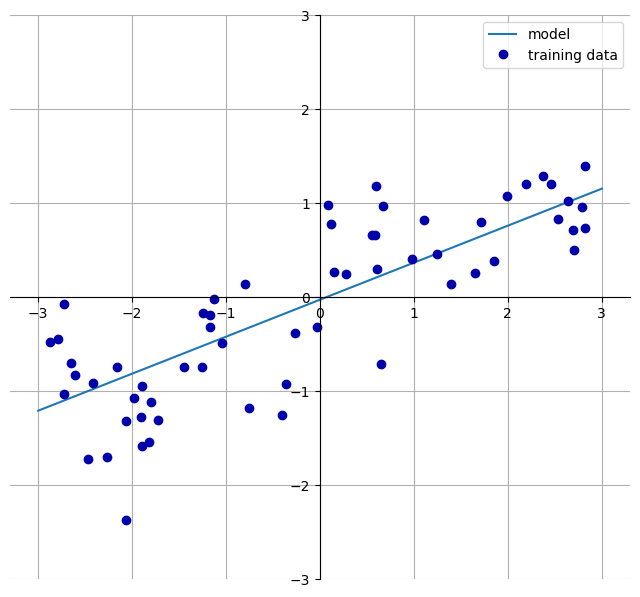

In [2]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression (aka ordinary least squares)

https://en.wikipedia.org/wiki/Least_squares

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


<b>NOTE</b><br>
For regression <code>y = w[0]x[0] + w[1]x[1] + ... + w[n]x[n] + b</code><br>
Coefficients are set <code>w</code><br>
And Intercept is a bias <code>b</code><br>

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Here an overfitting can be noticed. Let's check, how will the model perform on data with more dimensions

In [6]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Difference between train set score and test set score is a clear sign of overfitting. To avoid that, model should be easier. <b>Rigde regression</b> is a common solution for such a problem

## Ridge regression

https://en.wikipedia.org/wiki/Ridge_regression
<br>
<br>
Ridge regression is also a linear model. However, ridge regression have one additional limitation. In ridge regression, the magnitude of coefficients should be as small as possible, I.E. <code>w[k]</code> are close to zero. In such a case, impact of each feature on output is really small.
<br>
This constraint is an example of so-called regularization

In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Ridge regression complexity can be decreased by increasing alpha(by increasing how restricted it is)

In [9]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Let's now increase it's complexity

As we see, for such a small alpha Ridge Regression behaves almost like a common Linear Regression

In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Let's inspect, how model coefficients magnitude changes with alpha

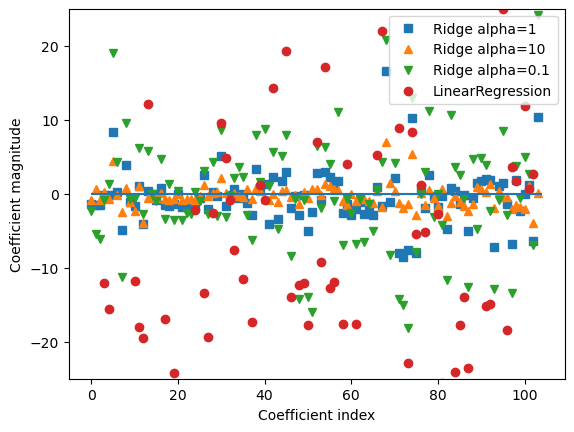

In [11]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso

Lasso is an alternative to Ridge for regularizing linear Regression. In spite of Ridge, which uses <code>L2</code> regularization, Lasso uses <code>L2</code> regularization.
<br>
<br>
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
<br>
<br>
As a result of L1 regularization, some coefficients in regression are exactly 0.


In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As it can be noticed, Lasso is really bad here. It is a sign, that underfitting was met. Analogically to Ridge, Lasso has an argument alpha, which allows to adjust model complexity. Let's make it more complex by decreasing alpha.

In [13]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


As it can be noticed, Lasso is approximately as effective as Ridge.<br>
Let's now check how Lasso will overfit

In [14]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Almost all features used, which means Lasso behaves here almost as a Linear Regression<br>
Let's again check values for model coefficients for each alpha

Text(0, 0.5, 'Coefficient magnitude')

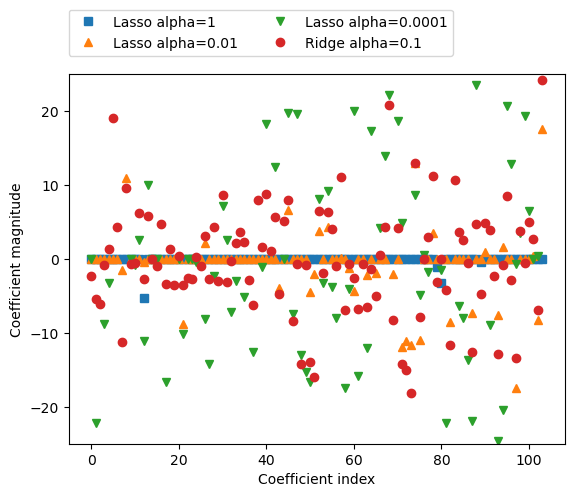

In [15]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

It is obvious, that in Ridge model is more flexible due to the fact, that all Ridge regression coefficients can be non-zero.<br>
scikit-learn also provides model, which combines the penalties of Lasso and Ridge: <code>ElasticNet</code>. It have the best performance of all those models. However, there are 2 parameters to adjust: one for L1 and one for L2 regularization

## Linear models for classification

<b>Binary classification</b> is made using the following formula:<br>
y = w[0]x[0] + w[1]x[1] + ... + w[n]x[n] + b > 0<br>
<br>
If y > 0, predict is: <b>+1</b><br>
Else, predict is : <b>-1</b>

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
* The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
* If and what kind of regularization they use

Most commonly used linear classification algorithms are <code>Logistic regression</code> and <code>Linear Support vector machine</code>(or SVM)<br>
Both of them use <b>L2 regularization</b>

/home/ritter/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


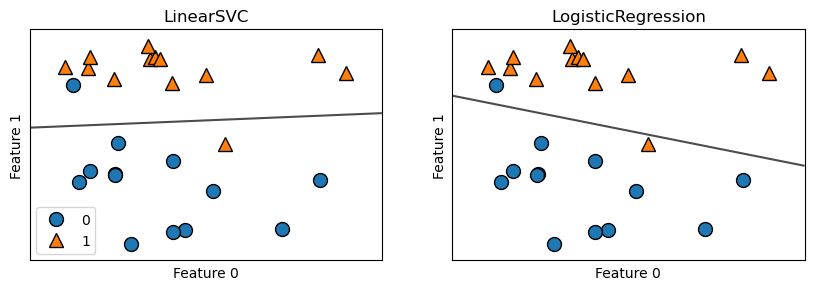

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Parameter, which is responsible for regularization in both models is called <code>c</code><br>
The bigger value for c, the less regularized model is. As result, model is trying to fit train data more, but performs worse on generalization.<br>
Here is an example:

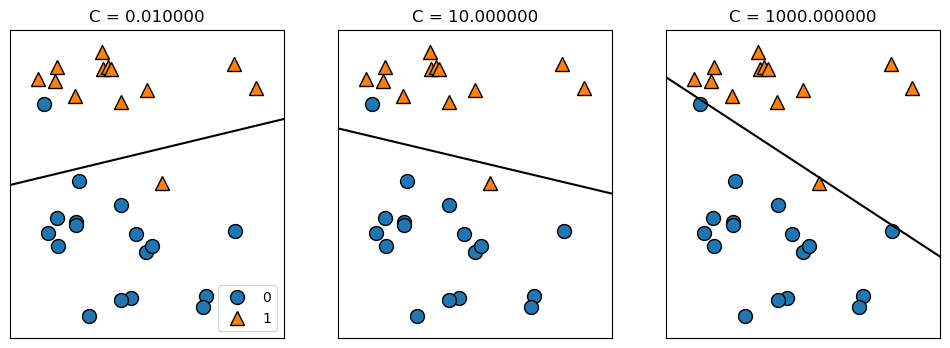

In [17]:
mglearn.plots.plot_linear_svc_regularization()

It can seem that regularization in useless in a case when there is a small amount of features. However, it becomes very powerful on higher-dimensional data.

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


There is no difference between train and test score, so there is an underfit. Let's make c more to make model to flexible

In [23]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


If decrease c, performance also decreases

In [25]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


Now, let's check values for model coefficients for different value of parameter c

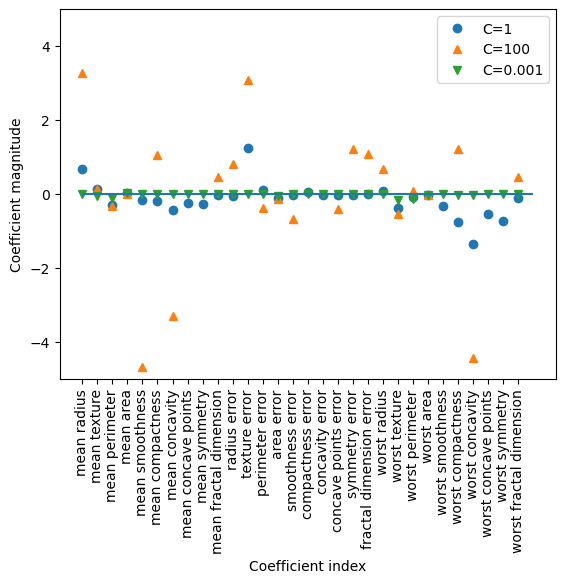

In [26]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()